In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import cross_val_score


In [3]:
#THE CURRENT CSV FILE IS FULLY PRE-PROCESSED
df = pd.read_csv("farmket_product_recommendation .csv")

In [4]:
df.head()

,product,clicks,buy,temperature,humidity,ph,rainfall,label,time,month,year,wind,latitude,longitutude
0,virtako,42,43,20.879744,82.002744,6.502985,202.935536,rice,09:01,7,2020,18.0,29.071939,77.19075
1,virtako,58,41,21.770462,80.319644,7.038096,226.655537,rice,09:02,7,2020,19.0,29.071939,77.19075
2,virtako,55,44,23.004459,82.320763,7.840207,263.964248,rice,09:02,7,2020,18.0,29.071939,77.19075
3,virtako,35,40,26.491096,80.158363,6.980401,242.864034,rice,09:01,7,2020,19.0,29.071939,77.19075
4,virtako,42,42,20.130175,81.604873,7.628473,262.717340,rice,09:02,7,2020,18.0,29.071939,77.19075


In [5]:
df.tail()

,product,clicks,buy,temperature,humidity,ph,rainfall,label,time,month,year,wind,latitude,longitutude
2195,kalia,34,32,26.774637,66.413269,6.780064,177.774507,coffee,09:02,7,2020,17.046429,29.071939,77.19075
2196,kalia,15,27,27.417112,56.636362,6.086922,127.924610,coffee,09:01,7,2020,17.042857,29.071939,77.19075
2197,kalia,33,30,24.131797,67.225123,6.362608,173.322839,coffee,09:02,7,2020,17.039286,29.071939,77.19075
2198,kalia,32,34,26.272418,52.127394,6.758793,127.175293,coffee,09:02,7,2020,17.035714,29.071939,77.19075
2199,kalia,18,30,23.603016,60.396475,6.779833,140.937041,coffee,09:01,7,2020,17.032143,29.071939,77.19075


In [6]:
df.shape

(2200, 14)

In [7]:
df.size

30800

In [11]:
df['product'].unique()

array(['virtako', 'ferterra', 'corogen', 'kalia'], dtype=object)

In [12]:
df.notnull().head()

,product,clicks,buy,temperature,humidity,ph,rainfall,label,time,month,year,wind,latitude,longitutude
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [13]:
df['product'].value_counts()

virtako     1002
corogen      612
kalia        439
ferterra     147
Name: product, dtype: int64

<AxesSubplot:>

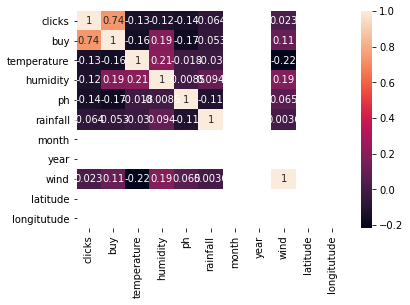

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df.columns

Index(['product', 'clicks', 'buy', 'temperature', 'humidity', 'ph', 'rainfall',
       'label', 'time ', 'month', 'year', 'wind', 'latitude', 'longitutude'],
      dtype='object')

In [16]:
features = df[['clicks', 'buy','wind','latitude','longitutude','temperature', 'humidity', 'ph', 'rainfall','month'
              ,'year']] #time,date and label to be included too
target = df['product']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=2)

[0.17197154 0.24533284 0.13818146 0.         0.         0.07645873
 0.17557622 0.04255384 0.14992538 0.         0.        ]


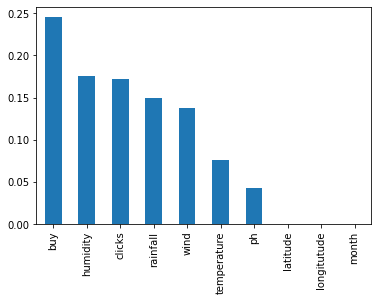

In [18]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

et_model =ExtraTreesClassifier()
et_model.fit(x_train, y_train)


print(et_model.feature_importances_)

feat_imp = pd.Series(et_model.feature_importances_, index=x_train.columns)
feat_imp.nlargest(10).plot(kind='bar')
plt.show()

In [19]:
acc=[]
model=[]
val=[]

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
dt.fit(x_train,y_train)

predicted_values=dt.predict(x_test)
x = metrics.accuracy_score(y_test,predicted_values)
acc.append(x)
model.append('Decision Tree')

print("DecisionTrees's Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  98.86363636363636
              precision    recall  f1-score   support

     corogen       1.00      1.00      1.00       120
    ferterra       1.00      1.00      1.00        30
       kalia       0.99      0.96      0.97       101
     virtako       0.98      0.99      0.99       189

    accuracy                           0.99       440
   macro avg       0.99      0.99      0.99       440
weighted avg       0.99      0.99      0.99       440



In [21]:
score = cross_val_score(dt,features,target,cv=300)
print("Mean CV score is :", score.mean()*100)
val.append(score.mean()*100)

Mean CV score is : 99.0297619047619


In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

predicted_values = nb.predict(x_test)
x = metrics.accuracy_score(y_test,predicted_values)
acc.append(x)
model.append('Gaussian Naive Bayes')


print("Naive Bayes's accuracy is : ",x*100)
print(classification_report(y_test,predicted_values))

Naive Bayes's accuracy is :  76.36363636363637
              precision    recall  f1-score   support

     corogen       0.92      0.68      0.78       120
    ferterra       0.74      0.97      0.84        30
       kalia       0.58      0.77      0.66       101
     virtako       0.83      0.78      0.80       189

    accuracy                           0.76       440
   macro avg       0.77      0.80      0.77       440
weighted avg       0.79      0.76      0.77       440



In [23]:
score = cross_val_score(nb,features,target,cv=300)
print("Mean CV score is :", score.mean()*100)
val.append(score.mean()*100)

Mean CV score is : 77.67261904761904


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50,random_state=2)
rf.fit(x_train,y_train)

predicted_values = rf.predict(x_test)
x=metrics.accuracy_score(y_test,predicted_values)
acc.append(x)
model.append("Random Forest Classifier")

print("Random Forest Classifier's accuracy is : ",x*100)
print(classification_report(y_test,predicted_values))

Random Forest Classifier's accuracy is :  100.0
              precision    recall  f1-score   support

     corogen       1.00      1.00      1.00       120
    ferterra       1.00      1.00      1.00        30
       kalia       1.00      1.00      1.00       101
     virtako       1.00      1.00      1.00       189

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440



In [25]:
score = cross_val_score(rf,features,target,cv=300)
print("Mean CV score is :", score.mean()*100)
val.append(score.mean()*100)

Mean CV score is : 99.64285714285714


In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=2)
lr.fit(x_train,y_train)

predicted_values = lr.predict(x_test)
x = metrics.accuracy_score(y_test,predicted_values)
acc.append(x)
model.append("Logistic Regression")

print("Logistic Regression's Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  61.59090909090909
              precision    recall  f1-score   support

     corogen       0.73      0.60      0.66       120
    ferterra       0.00      0.00      0.00        30
       kalia       0.53      0.41      0.46       101
     virtako       0.60      0.84      0.70       189

    accuracy                           0.62       440
   macro avg       0.46      0.46      0.45       440
weighted avg       0.58      0.62      0.58       440



In [27]:
score = cross_val_score(lr,features,target,cv=300)
print("Mean CV score is :", score.mean()*100)
val.append(score.mean()*100)

Mean CV score is : 64.44047619047618


In [28]:
# duplicate_columns = x_train.columns[x_train.columns.duplicated()]
# duplicate_columns

In [29]:
from xgboost import XGBClassifier
XB = XGBClassifier()
XB.fit(x_train,y_train)

predicted_values = XB.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

[14:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  1.0
              precision    recall  f1-score   support

     corogen       1.00      1.00      1.00       120
    ferterra       1.00      1.00      1.00        30
       kalia       1.00      1.00      1.00       101
     virtako       1.00      1.00      1.00       189

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440



In [30]:
score = cross_val_score(XB,features,target,cv=300)
print("Mean CV score is :", score.mean()*100)
val.append(score.mean()*100)

[14:13:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean CV score is : 99.58928571428572


In [31]:
print(acc)
print(model)
print(val)

[0.9886363636363636, 0.7636363636363637, 1.0, 0.615909090909091, 1.0]
['Decision Tree', 'Gaussian Naive Bayes', 'Random Forest Classifier', 'Logistic Regression', 'XGBoost']
[99.0297619047619, 77.67261904761904, 99.64285714285714, 64.44047619047618, 99.58928571428572]


[0.9886363636363636, 0.7636363636363637, 1.0, 0.615909090909091, 1.0]


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

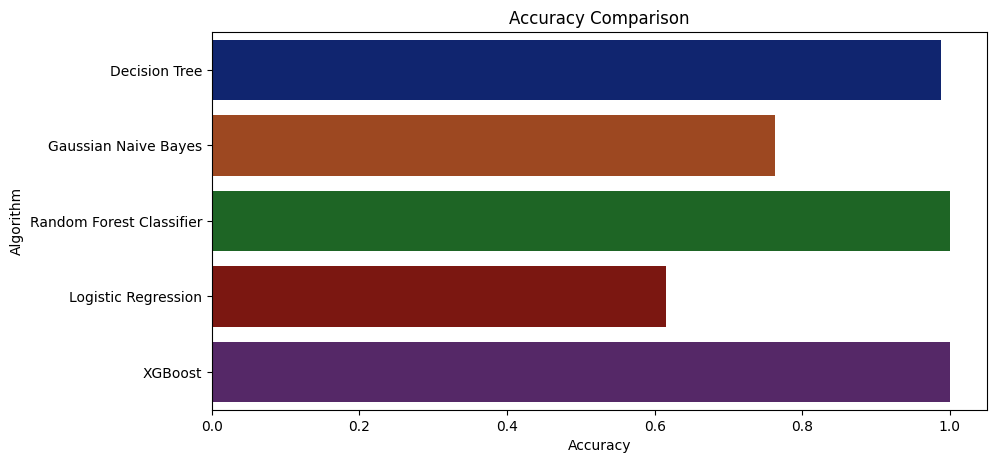

In [32]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
print(acc)
sns.barplot(x = acc,y = model,palette='dark')

[99.0297619047619, 77.67261904761904, 99.64285714285714, 64.44047619047618, 99.58928571428572]


<AxesSubplot:title={'center':'Cross Val Score Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

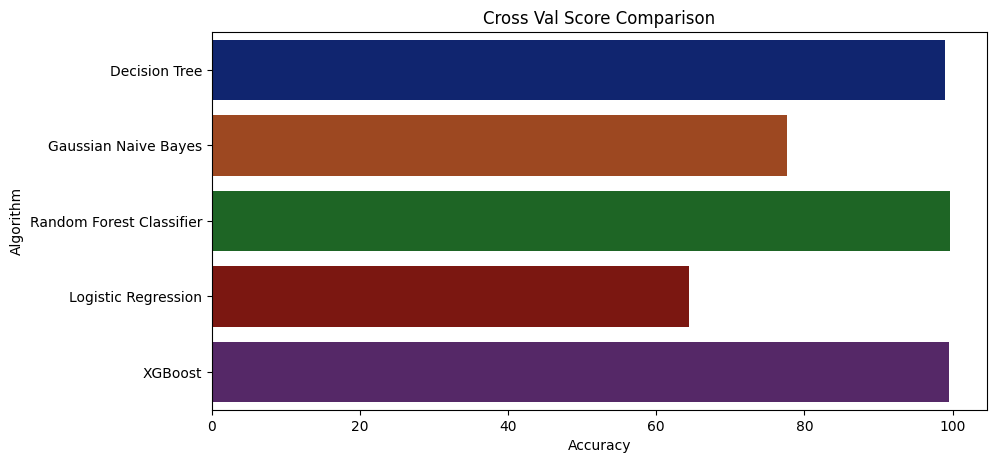

In [33]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Cross Val Score Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
print(val)
sns.barplot(x = val,y = model,palette='dark')

In [34]:
features.head()

,clicks,buy,wind,latitude,longitutude,temperature,humidity,ph,rainfall,month,year
0,42,43,18.0,29.071939,77.19075,20.879744,82.002744,6.502985,202.935536,7,2020
1,58,41,19.0,29.071939,77.19075,21.770462,80.319644,7.038096,226.655537,7,2020
2,55,44,18.0,29.071939,77.19075,23.004459,82.320763,7.840207,263.964248,7,2020
3,35,40,19.0,29.071939,77.19075,26.491096,80.158363,6.980401,242.864034,7,2020
4,42,42,18.0,29.071939,77.19075,20.130175,81.604873,7.628473,262.717340,7,2020


In [35]:
data = np.array([[15,30,23,29.07,77.15,65.496,80.633,6.9401,186.86034,7,2020]])
prediction = rf.predict(data)

In [36]:
print(prediction)

['kalia']


In [37]:
data = np.array([[15,34,23,29,77.15,66,83,6,16,7,12]])
prediction = rf.predict(data)

print(prediction)

['virtako']
